# GDP and Life Expectancy Analysis
This project aims to analyse correlation between GDP and Life Expectancy in six different countries. The data was from the World Health Organization and the World Bank and recorded in the file "all_data.csv". The data provided GDP and life expectancy in Chile, China, German, Mexico, the U.S. and Zimbabwe during 2000-2015

In [44]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [45]:
# set the scientific format of GDP in csv file to original form
pd.set_option('display.float_format', '{:.2f}'.format)

## Load Data
The given "all_data.csv" file consists of 4 columns as followings:
- **Country** - a country observed
- **Year** - recorded years ranged from 2000 to 2015
- **Life expectancy at birth (years)** - the lifespan of people estimated at birth
- **GDP** - gross domestic product which is one of the measurement of economy growth

In [46]:
# load data from csv file
df = pd.read_csv("all_data.csv")

In [47]:
# look at the first five rows of dataset
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


In [48]:
# to glance at descriptive statistics of each numeric columns
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.00,96.00,96.00
mean,2007.50,72.79,3880498570768.40
std,4.63,10.67,5197561310975.92
min,2000.00,44.30,4415702800.00
25%,2003.75,74.47,173301750000.00
50%,2007.50,76.75,1280220000000.00
75%,2011.25,78.90,4067510000000.00
max,2015.00,81.00,18100000000000.00


In [49]:
# check the unique countries in the dataset
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

## Wrangling Data
To work with the dataset more easily, a column's name was shorten and a column's values were formatted to increase readability. 

In [50]:
# rename the long column name to the shorter name
df.rename({"Life expectancy at birth (years)": "LE"}, axis=1, inplace=True)

# add the column GDP_b by dividing GDP with 1 billion
df['GDP_b'] = df['GDP']/1000000000

# check if the column's name has changed
df.head()

,Country,Year,LE,GDP,GDP_b
0,Chile,2000,77.30,77860932152.00,77.86
1,Chile,2001,77.30,70979923960.00,70.98
2,Chile,2002,77.80,69736811435.00,69.74
3,Chile,2003,77.90,75643459840.00,75.64
4,Chile,2004,78.00,99210392858.00,99.21


## Questions
After skimming the dataset, the questions that were interesting were listed as follows:
- How much are the average GDP and life expectancy of all six countries?
- How had the GDP and life expectancy of each country changed over the period?
- Was there any relationship between GDP and life expectancy?

In [51]:
# create a table that demonstrates average GDP and life expectancy of each country
avg_gdp_le = df.groupby('Country').mean()
avg_gdp_le = avg_gdp_le.drop(['Year', 'GDP'], axis=1)
avg_gdp_le = avg_gdp_le.sort_values('LE', ascending=False).reset_index()
avg_gdp_le

,Country,LE,GDP_b
0,Germany,79.66,3094.78
1,Chile,78.94,169.79
2,United States of America,78.06,14075.00
3,Mexico,75.72,976.65
4,China,74.26,4957.71
5,Zimbabwe,50.09,9.06


The table shows that most countries had average life expectancy from 74 to 79 years old, their GDPs diversed, though. Only Zimbabwe had the lowest average lifespan at around 50 years old and very low GDP at about 9 billion US dollars.

# Data Visualization
To compare the difference between GDP and life expectancy of six countries, three diagrams had been developed as following:
- Average Life expectancy of each countries (bar graph)
- Avergae GDP (billion USD) of each countries (bar graph)
- GDP during 2000-2015 (line graph)
- Life expectancy at birth during 2000-2015 (line graph)
- GDP & life expectancy between 2000-2015 (scatter plots)

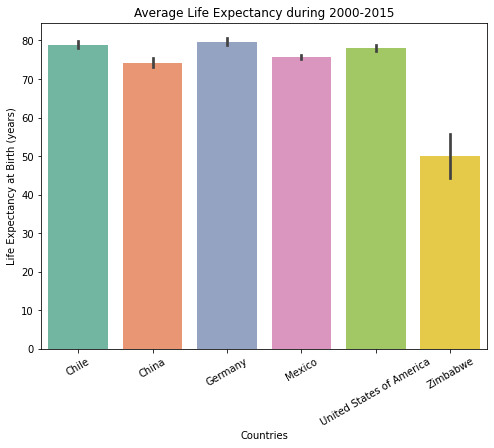

In [52]:
# create a bar graph of average life expectancy
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax = sns.barplot(data =df, x='Country', y='LE', ci='sd', palette='Set2', estimator=np.mean)
ax.set_xticklabels(labels=df.Country.unique().tolist(), rotation=30)
ax.set_ylabel("Life Expectancy at Birth (years)")
ax.set_xlabel("Countries")
ax.set_title("Average Life Expectancy during 2000-2015")
plt.show()

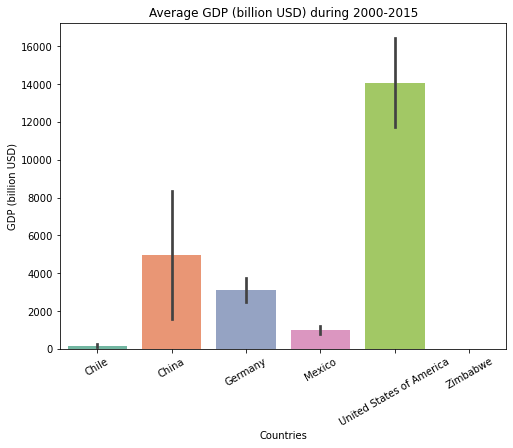

In [53]:
# create a bar graph of average GDP (billion USD)
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax = sns.barplot(data =df, x='Country', y='GDP_b', ci='sd', palette='Set2', estimator=np.mean)
ax.set_xticklabels(labels=df.Country.unique().tolist(), rotation=30)
ax.set_ylabel("GDP (billion USD)")
ax.set_xlabel("Countries")
ax.set_title("Average GDP (billion USD) during 2000-2015")
plt.show()

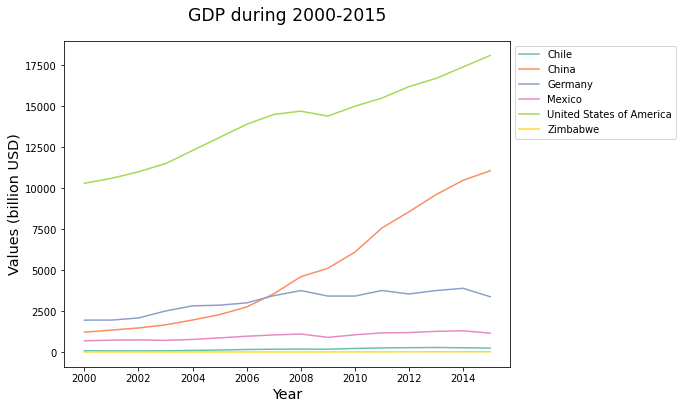

In [54]:
"""    
To create a line graph which show the GDP values of six countries from 2000 to 2015
"""
# create countries list
countries = df.Country.unique().tolist()

#create labels and x ticks for x-axis
years = [str(2000+x) for x in range(0, 16)]

    
# create a figure
fig, ax = plt.subplots(figsize=(8,6))

# plot graph
ax = sns.lineplot(data = df, x='Year', y='GDP_b', hue='Country', palette='Set2')

ax.legend(bbox_to_anchor=[1, 1], loc='upper left')
ax.set_ylabel("Values (billion USD)", fontsize= 'x-large')
ax.set_xlabel("Year", fontsize="x-large")
ax.set_title("GDP during 2000-2015", fontsize='xx-large', pad=20)
plt.show()

The GDP of all six countries had risen throughout the period. However, the U.S.'s GDP had steadily grown and far exceeded the other countries. Meanwhile, China's GDP had surged up since 2008. There were only slight increases of GDP of the rest.

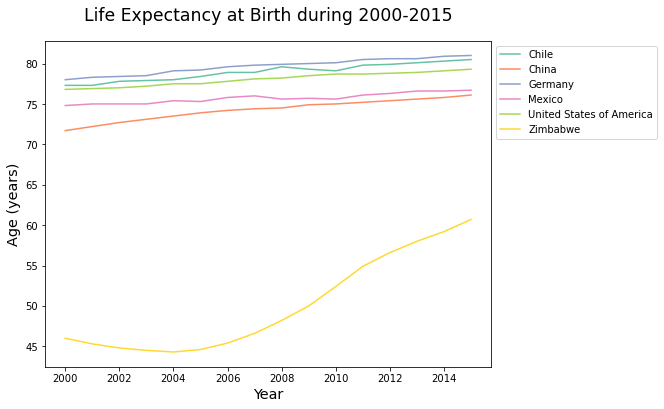

In [55]:
"""    
To create a line graph which shows life expectancy of six countries from 2000 to 2015
"""
# create countries list
countries = df.Country.unique().tolist()

#create labels and x ticks for x-axis
years = [str(2000+x) for x in range(0, 16)]

    
# create a figure
fig, ax = plt.subplots(figsize=(8,6))

# plot graph
ax = sns.lineplot(data = df, x='Year', y='LE', hue='Country', palette='Set2')

ax.set_title("Life Expectancy at Birth during 2000-2015", fontsize='xx-large', pad=20)
ax.legend(bbox_to_anchor=[1, 1], loc='upper left')
ax.set_ylabel("Age (years)", fontsize= 'x-large')
ax.set_xlabel("Year", fontsize='x-large')
plt.show()

Comparing both GDP and life expectancy line graphs above, German population had the longest lifespan whereas Zimbabwe population had the shortest longevity. It was clear that in the exception of Zimbabwe most countries had very similar trends of life expectancy (from 72-80 years old), even though their GDP varied. Furthermore, China which its GDP had risen rapidly and won over the other countries' GDP since 2008  had a bit lower life expectancy than other countries excluding Zimbabwe. 

In Zimbabwe, people were supposed to live until 46 years old in 2000. Then, the life expectancy had dipped to 44 years old in 2004 before risen sharply to nearly 60 years old in 2015.

<Figure size 432x288 with 0 Axes>

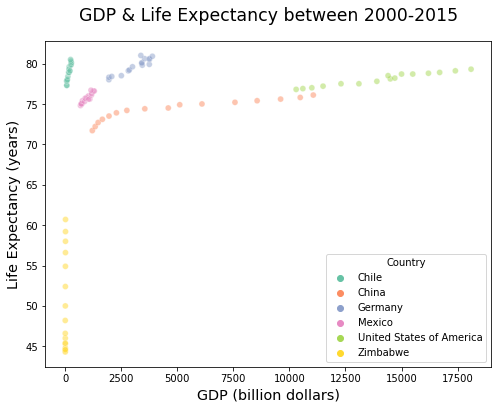

In [56]:
plt.clf()
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2 = sns.scatterplot(data=df, x='GDP_b', y='LE', hue='Country', palette='Set2', alpha=0.5)
ax2.set_xlabel("GDP (billion dollars)", fontsize='x-large')
ax2.set_ylabel("Life Expectancy (years)", fontsize='x-large')
ax2.set_title("GDP & Life Expectancy between 2000-2015", fontsize='xx-large', pad=20)
plt.show()


Three countries - Zimbabwe, Mexico, and Chile, had very low GDP values compared to other countries. However, their life expectancy were very different. Chilians and Mexicans were supposed to live much longer than Zimbabwe's people. Moreover, people from Chile, Mexico also had longer lifespan than Chinese people, even though their countries' GDP values were much inferior to the Chinese's.

<Figure size 432x288 with 0 Axes>

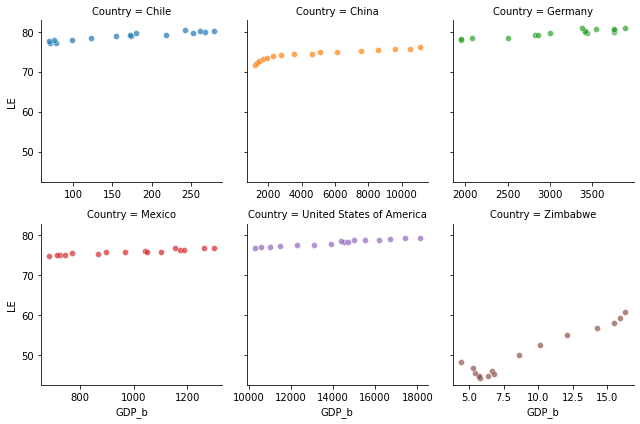

In [57]:
plt.clf()
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=3, sharex=False, hue='Country')
g.map(sns.scatterplot, 'GDP_b', 'LE', data=df, alpha=0.7)


## Summary
- During 2000 - 2015, the average life expectancy of each countries were between 74 - 79 years old, while the average life expectancy of Zimbabwe was at around 50 years old. Germany had the longest life expectancy in contrast with Zimbabwe which had the shortest life expectancy.
- In aspect of GDP, the U.S.'s GDP had far exceeded the other countries observed throughout the period, starting from 10,000 billion USD in 2000 to nearly 17,500 billion USD. Meanwhile, the rest started at under 2,500 billion USD in 2000. However, Chinese GDP had begun to surge since 2007 to about 10,000 billion USD in 2015. The trends of GDP of Germany, Mexico, Chile and Zimbabwe increased very slightly over the period.
- There were a linear relationship between GDP and life expectancy. The more the GDP value was, the more the longevity was. Most countries had high life expectancy which had risen slightly when the GDP had grown. Zimbabwe's longevity had the fastest growth during the period.
- The average GDP is not the only factor of people's life expectancy. In some countries, the life expectancy slightly increased as the GDP sharply increased such as the U.S. and China. In a number of countries, people had very long estimated lifespan as well, nevertheless their GDP were low compared to the former group.
- Between 2000-2015, most countries had estimated lifespan ranging from 72-80 years old. In contrast, Zimbabwe people were expected to live until only 45 years old in 2000 and up to around 60 years old in 2015.

## Note
- It is very interesting to delve more into the other factors that lead to longevity rather than the GDP value. 